In [2]:
from scipy import linalg as lg
from scipy import optimize as op
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Sistema de la forma ax = b
a = sp.Matrix([[2,3],[4,5]])
b = sp.Matrix([4,3])
# Algunas caracteristicas de a
# numero de condicion (indica sensibilidad de A)
a.condition_number()
#punto flotante
sp.a()
# norma de la matriz
a.norm()
#rango de la matriz
a.ran()

AttributeError: ignored

In [9]:
# representacion numérica
a = np.array([[2,3],[4,5]])
b = np.array([4,3])
#Caracteristicas numericas de a
# numero de condicion
np.linalg.cond(a)
# norma de la matriz
np.linalg.norm(a)
# rango de la matriz
np.linalg.matrix_rank(a)

2

In [11]:
# solucion simbolica del sistema
a = sp.Matrix([[2,3],[4,5]])
b = sp.Matrix([4,3])
#Descomposicion LU
L, U,_ = a.LUdecomposition()
#Solucion via LU
a.LUsolve(b)
#solucion clasica
x = a.solve(b)
x

Matrix([
[-11/2],
[    5]])

In [15]:
a = sp.Matrix([[2,3],[4,5]])
b = sp.Matrix([4,3])
#Descomposicion LU
P,L,U = lg.lu(a)
#producto lu via la permutación
P.dot(L.dot(U))
#solucion
lg.solve(a,b)

ValueError: ignored

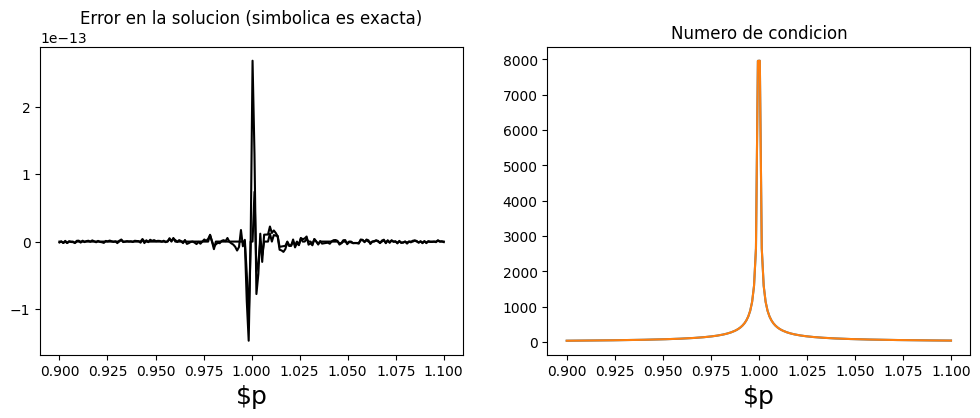

In [27]:
#Caso de esudio (Revfisar una matriz cerca de su valor de singularidad)
p = sp.symbols('p', positive=True)
a = sp.Matrix([[1, sp.sqrt(p)],[1, 1/sp.sqrt(p)]])
b = sp.Matrix([1,2])
#Solucion simbolica
x_sym_sol = a.solve(b)
acond = a.condition_number()
# especificacion numerica para varios p
aa = lambda p : np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
bb = np.array([1,2])
x_num_sol = lambda p: np.linalg.solve(aa(p), bb)
# Grafica de soluciones
fig, axes = plt.subplots(1,2,figsize=(12,4))
p_vec = np.linspace(0.9,1.1,200)
for n in range(2):
    x_sym = np.array([x_sym_sol[n]. subs(p,pp).evalf() for pp in p_vec ])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec ])
    axes[0].plot(p_vec,(x_num-x_sym)/x_sym,'k')
    axes[0].set_title('Error en la solucion (simbolica es exacta)')
    axes[0].set_xlabel(r'$p', fontsize = 18)
    axes[1].plot(p_vec, [acond.subs(p,pp).evalf() for pp in p_vec])
    axes[1].set_title('Numero de condicion')
    axes[1].set_xlabel(r'$p', fontsize=18)